---
title: データフレームしたい（pd.DataFrame）
subject: pandasの使い方
keywords: [python, pandas]
authors:
  - Shota Takahashi
exports:
  - format: pdf  
---

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import hvplot.pandas

print(f"Pandas: {pd.__version__}")
# print(f"HvPlot: {hvplot.__version__}")

Pandas: 2.2.2


# 乱数を使ったサンプルデータしたい

- ``x``: ガウス分布
- ``y``: `(4, 8)`の一様分布
- ``z``: `(0, 10)`の整数の一様分布

In [15]:
rng = np.random.default_rng(511)  # シードを固定
n = 1000

x = rng.normal(size=n)
y = rng.uniform(4, 8, size=n)
z = rng.integers(0, 10, size=n)

# 辞書型を変換したい

```python
samples = {
    "x": [リスト],
    "y": [リスト],
    "z": [リスト],
}
```

- リスト型の値をもつ辞書型オブジェクトは、そのまま``pd.DataFrame`` に食べさせることができます。


In [16]:
rng = np.random.default_rng()
n = 1000

samples = {
    "x": rng.normal(size=n),
    "y": rng.uniform(4, 8, size=n),
    "z": rng.integers(0, 10, size=n),
}

data = pd.DataFrame(samples)
data

,x,y,z
0,-0.355833,4.268691,7
1,0.220107,5.486287,3
2,0.194590,4.253444,6
3,0.941098,6.728444,2
4,0.626823,5.121609,5
...,...,...,...
995,-0.058711,5.202874,8
996,1.162712,7.804366,2
997,-1.860068,6.512514,6
998,0.507734,4.171623,3


<Axes: xlabel='z', ylabel='y'>

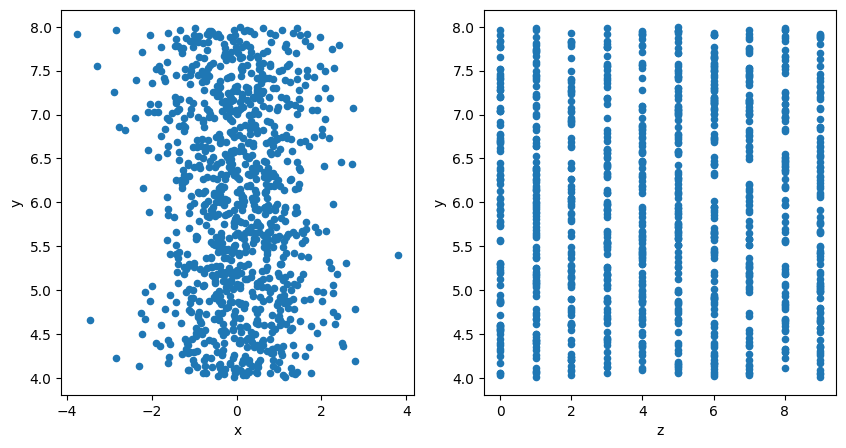

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
canvas = axs.ravel()
data.plot.scatter("x", "y", ax=canvas[0])
data.plot.scatter("z", "y", ax=canvas[1])

# 辞書型リストを変換したい

```python
samples = (
    {"x": 値1, "y": 値1, "z": 値1},
    {"x": 値2, "y": 値2, "z": 値2},
    ...,
    {"x": 値n, "y": 値n, "z": 値n},
)
```

- 辞書型リスト（``list[dict[str, Any]]``）、辞書型タプル（``tuple[dict[str, Any]]``）をデータフレームに変換できます
- 辞書のキーがカラム名になります

In [18]:
import random

samples = (
    {"x": random.gauss(), "y": random.uniform(4, 8), "z": random.randint(0, 10)}
    for i in range(1000)
)

data = pd.DataFrame(samples)
data

,x,y,z
0,-0.337052,5.002762,3
1,1.447623,7.108794,8
2,0.515996,5.575909,1
3,1.725383,4.772462,1
4,-0.537114,4.258417,4
...,...,...,...
995,-0.038078,6.149875,5
996,0.722572,7.403416,1
997,-0.185487,7.292810,4
998,0.502547,6.913608,8


# リスト型リストを変換したい

```python
samples = [
    [リスト],    # x列
    [リスト],    # y列
    [リスト],    # z列
]
```

- リスト型リスト（``list[list]``）、タプル型リスト（``list[tuple]``）、リスト型タプル（``tuple[list]``）、タプル型タプル（``tuple[tuple]``）をデータフレームに変換します
- ``columns``オプションを使ってカラム名を変更できます

In [19]:
import random

samples = [
    (random.gauss(), random.uniform(4, 8), random.randint(0, 10)) for i in range(1000)
]
data = pd.DataFrame(samples, columns=["x", "y", "z"])
data

,x,y,z
0,0.341449,4.889931,7
1,-0.132962,7.844455,3
2,0.070683,4.818219,1
3,0.247282,5.499515,2
4,1.235738,6.306245,10
...,...,...,...
995,1.308034,4.545554,0
996,-2.514965,7.162523,3
997,-1.491498,4.622272,8
998,1.485749,5.977225,5
